<a href="https://colab.research.google.com/github/DeenoBajithaCode/kmeans-wholesale-clustering/blob/main/kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 84.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f37e48d6728475f3d884e2a285590c21b13c2b1981e92da02ce6e01394ccca55
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [6]:
import pandas as pd
from ydata_profiling import ProfileReport

#Load your dataset
data = pd.read_csv('/content/drive/MyDrive/partitioning/Wholesale customers data.csv')

#Create a data visualisation profile report for your data
profile = ProfileReport(data, title="Profiling Report")

#Save your profile report as HTML web page
profile.to_file("Wholesle_Profile.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 65.77it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
#list the variables names
list(data.columns)


['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']

In [8]:
# Exclude Region and Channel
df = data.drop(['Region', 'Channel'], axis=1)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [9]:
# Import the standard scaler
from sklearn.preprocessing import StandardScaler

# Initiate the standard scaler
scaler = StandardScaler()

# Scale your dataset
df_scaled = scaler.fit_transform(df)

# Convert df scaled values to a new data frame df_scaled
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [10]:
# Import K-Means algorith
from sklearn.cluster import KMeans

# defining the kmeans function with initialization as random
kmeans = KMeans(n_clusters=2, init='random')

# fitting the k means algorithm on scaled data
kmeans.fit(df_scaled)

KMeans(init='random', n_clusters=2)

In [11]:
# inertia (Total variations) on the fitted data
kmeans.inertia_

1954.0416346097822

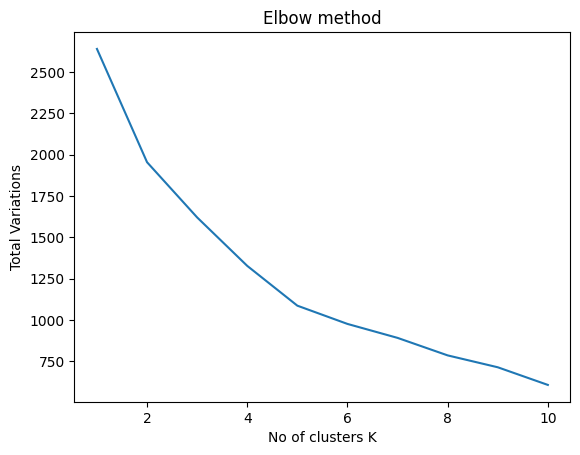

In [12]:
# Import matplot to plot the elbow chart
import matplotlib.pyplot as plt

# Import numpy to generate a number sequance
import numpy as np

# Before running the algorithm, there are no variations
# Start with an empty list of total variations values
Total_variations =[]

# Select a range of k values (clusters) between 1 and 11 clusters
# Build a k-means model for each k value, and append the total variations value
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='random').fit(df_scaled)
    Total_variations.append(kmeans.inertia_)

# Plot the K range of values against the Total variations
plt.plot(range(1, 11), Total_variations)
plt.title('Elbow method')
plt.xlabel('No of clusters K')
plt.ylabel('Total Variations')
plt.show()

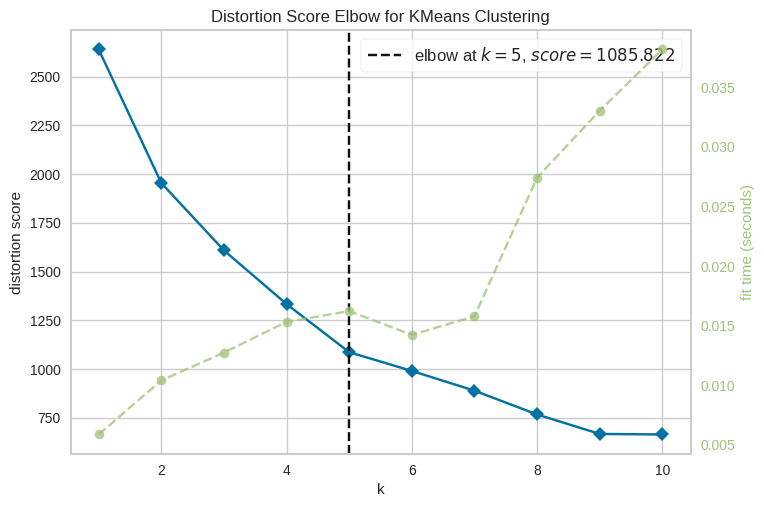

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
# Install yellowbrick package for elbow method
!pip install yellowbrick

# Import KElbowVisualizer from yellowbrick
from yellowbrick.cluster import KElbowVisualizer

# Initiate the elbow method
elbow_visualizer = KElbowVisualizer(kmeans, k=(1,11))

# Fit the KElbowVisualizer to the scaled data
elbow_visualizer.fit(df_scaled)
elbow_visualizer.show()

In [14]:
# defining the kmeans function with initialization as random
kmeans5 = KMeans(n_clusters=5, init='random')

# fitting the k means algorithm on scaled data
kmeans5.fit(df_scaled)

KMeans(init='random', n_clusters=5)

In [15]:
# Use kmeans (k=5) to label the data points into their 5 clusters
y_kmeans5 = kmeans5.fit_predict(df_scaled)
y_kmeans5

array([0, 4, 4, 0, 3, 0, 0, 0, 0, 4, 4, 0, 3, 4, 4, 0, 4, 0, 0, 0, 0, 0,
       3, 2, 4, 0, 0, 0, 4, 3, 0, 0, 0, 3, 0, 4, 3, 4, 4, 3, 3, 0, 4, 4,
       4, 4, 4, 2, 4, 4, 0, 0, 3, 4, 3, 0, 2, 4, 0, 0, 0, 2, 0, 4, 0, 2,
       0, 4, 0, 0, 0, 3, 0, 3, 0, 0, 0, 4, 0, 0, 0, 4, 4, 0, 0, 2, 2, 3,
       0, 3, 0, 0, 2, 3, 4, 0, 0, 0, 0, 0, 4, 4, 0, 3, 0, 0, 4, 4, 0, 4,
       0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 4, 4, 0, 4, 4, 4, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 4, 0, 4, 0, 4,
       3, 0, 0, 0, 0, 3, 4, 1, 0, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 3, 4,
       0, 0, 4, 4, 3, 0, 0, 4, 0, 0, 0, 4, 0, 2, 0, 0, 4, 4, 4, 0, 4, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 2, 0, 3, 4, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       4, 4, 4, 0, 4, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,

In [16]:
# Create a new column with the clusters labels
data['Cluster'] = y_kmeans5
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,4
2,2,3,6353,8808,7684,2405,3516,7844,4
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,3


In [17]:
shuffled_data = data.sample(frac=1)
shuffled_data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
381,1,3,17770,4591,1617,9927,246,532,0
319,2,2,9759,25071,17645,1128,12408,1625,4
52,2,3,40721,3916,5876,532,2587,1278,3
192,1,3,5509,1461,2251,547,187,409,0
179,1,3,3157,4888,2500,4477,273,2165,0
9,2,3,6006,11093,18881,1159,7425,2098,4
266,2,1,572,9763,22182,2221,4882,2563,4
185,1,3,8170,6448,1139,2181,58,247,0
64,1,3,4760,1227,3250,3724,1247,1145,0
125,1,3,76237,3473,7102,16538,778,918,3


In [18]:
data['Cluster'].value_counts()

,count
Cluster,
0,277
4,96
3,54
2,11
1,2
